<a href="https://colab.research.google.com/github/CharalapML/ColabCode/blob/main/Azimuth_and_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **This code looks at calculating distances betwen two points and also plotting those points on a polar plot**

In [2]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

x1= int(input("please give the 1st X point (x1):" ))
y1= int(input("please give the 1st Y point (y1):" ))
x2= int(input("please give the 2nd X point (x2):" ))
y2= int(input("please give the 2nd Y point (y2):" ))

def AzimuthDir():
  global radians
  global Distance

  x=[x1, x2]
  y=[y1, y2]
  lst = []
  # This first point x1, y1 is red on the plot
  # This second point x2 ,y2 is blue on the plot
  print( min(x), max(x),min(y), max(y)    )
  colors = x
  C = np.array([[255, 0, 0], [0, 0, 255]])
  fig = plt.figure(figsize =(8,8))
  plt.axis('scaled')
  plt.ylabel('Y - UTM')
  plt.xlabel('X - UTM')
  plt.title('Relative Map Positions of Points 1 & 2')
  plt.scatter(x, y, c=C/255.0, s=50, cmap='hsv', alpha=0.75)
  plt.annotate('First point', xy=(x1+1, y1), xytext=((x1+(x1*.02)), y1),
            arrowprops=dict(facecolor='red', shrink=0.001))
  plt.xlim( (min(x)-( (max(x)-min(x)) *0.2) ), (max(x)+( (max(x)-min(x))*0.2)) )
  plt.ylim( (min(y)-( (max(y)-min(y)) *0.2) ), (max(y)+( (max(y)-min(y))*0.2)) )

  plt.show()
  xdiff = (x2-x1)
  ydiff = (y2-y1)
  print (xdiff, ydiff)
  Distance = math.sqrt( ( (x2-x1)**2) +( (y2-y1)**2) )

  # the following deals with when x1 == x2 and/ or y1 == y2  (i.e. the point are N-S, or E-W from each other)
  if y1==y2 and x1 < x2:
    radians = 90 * (math.pi/180)
    print ('The point x1,y1 is', (x1-x2), 'metres directly due east of the point x2, y2')
  elif y1==y2 and x1>x2:
    radians = 270 * (math.pi/180)
    print ('The point x1,y1 is', (x1-x2), 'metres directly due west of the point x2, y2')
  elif x1==x2 and y1<y2:
    radians = 0 * (math.pi/180)
    print ('The point x1,y1 is', (y1-y2), 'metres directly due south of the point x2, y2')
  elif x1==x2 and y1>y2:
    radians = 180 * (math.pi/180)
    print ('The point x1,y1 is', (y1-y2), 'metres directly due north of the point x2, y2')
  elif x1==x2 and y1==y2:
    radians = 0
    print ('The point x1,y1 is coincident with the point x2,y2')

  # the following deals with x1 not equaling x2 and y1 not equaling y2 by sectors (ie NW, SW, SE & NE quadrants of the compass)
  elif x2> x1 and y2> y1:
    degree =  (sp.asin (abs(ydiff/Distance)))*(180/math.pi)
    angle =  90 - degree
    radians = angle * (math.pi/180)
    print ("Degree = ",degree, "Angle = ", angle, "Radians =", radians)
    print('The point x2,y2 is',Distance, 'metres to the Northeast of the point x1,y1, on a bearing of', angle,'degrees from north')
  elif x2> x1 and y2< y1:
    degree =  (sp.asin (abs(xdiff/Distance)))*(180/math.pi)
    angle = 180 - degree
    radians = angle * (math.pi/180)
    print ("Degree = ",degree, "Angle = ", angle, "Radians =", radians)
    print('The point x2,y2 is',Distance, 'metres to the Southeast of the point x1,y1, on a bearing of', angle,'degrees from north')
  elif x2< x1 and y2< y1:
    degree =  (sp.asin (abs(xdiff/Distance)))*(180/math.pi)
    angle = 180 + degree
    radians = angle * (math.pi/180)
    print ("Degree = ",degree, "Angle = ", angle, "Radians =", radians)
    print('The point x2,y2 is',Distance, 'metres to the Southwest of the point x1,y1, on a bearing of', angle,'degrees from north')
  elif x2< x1 and y2> y1:
    degree =  (sp.asin (abs(ydiff/Distance)))*(180/math.pi)
    angle =  270 + degree
    radians = angle * (math.pi/180)
    print ("Degree = ",degree, "Angle = ", angle, "Radians =", radians)
    print('The point x2,y2 is',Distance, 'metres to the Northwest of the point x1,y1, on a bearing of', angle,'degrees from north')
  else:
    print ('does not fit', Distance)
  return radians, Distance
  print('this is what is in lst ' ,lst)

  plt.show()


def polarazi():
  #radians, Distance,c = AzimuthDir()
  deg=radians*(180/math.pi)
  print (radians, deg, Distance)

  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111, polar=True)
  ax.set_theta_zero_location("N")
  ax.set_theta_direction(-1)
  c = ax.scatter(radians, Distance, cmap='hsv', alpha=0.75)
  if Distance <=0:
    plt.ylim(ymax=1)
    plt.plot(ymax=0)
  else:
    plt.ylim(ymax=Distance *1.2)
    plt.plot(ymin=0)

  plt.plot(radians, Distance)
  # the following line puts the arrow on the polar plot showing the direction and location of the point
  ax.annotate("", xy=(radians, Distance), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
  plt.savefig("out.png")
  plt.show()



please give the 1st X point (x1):78
please give the 1st Y point (y1):56
please give the 2nd X point (x2):-12
please give the 2nd Y point (y2):-16


-12 78 -16 56


<ipython-input-2-3b14fc4a1c41>:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=C/255.0, s=50, cmap='hsv', alpha=0.75)


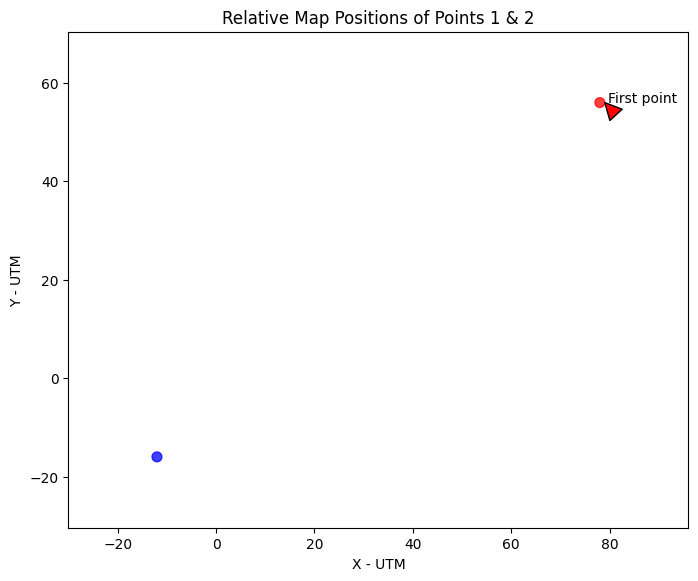

-90 -72
Degree =  51.3401917459099 Angle =  231.340191745910 Radians = 4.03764803816114
The point x2,y2 is 115.25623627379127 metres to the Southwest of the point x1,y1, on a bearing of 231.340191745910 degrees from north


(4.03764803816114, 115.25623627379127)

In [3]:
AzimuthDir()

4.03764803816114 231.340191745910 115.25623627379127


<ipython-input-2-3b14fc4a1c41>:99: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  c = ax.scatter(radians, Distance, cmap='hsv', alpha=0.75)


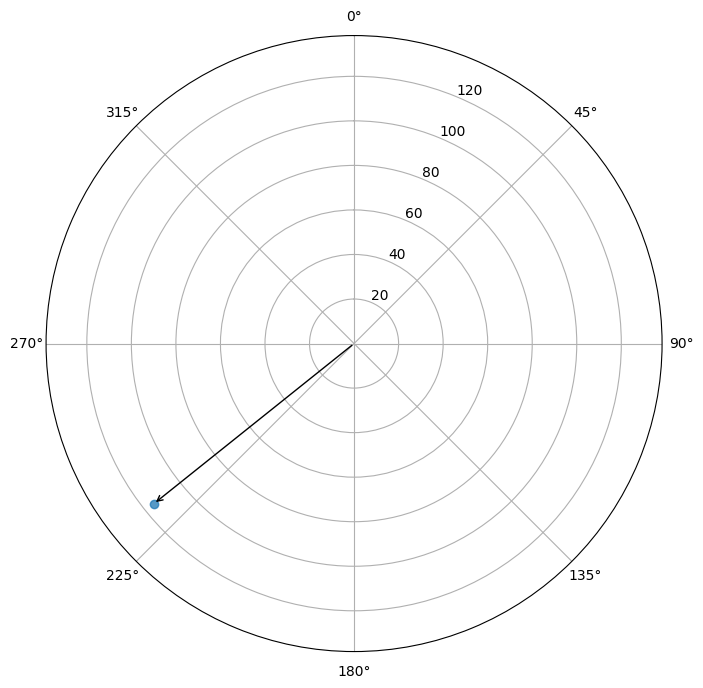

In [4]:
polarazi()